# Uncertainty Estimates
2 Methods
1. Decision Function (decision_function)
1. Predicted Probabilities (predict_proba)

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
iris_df = pd.read_csv('../../data/iris.csv', dtype = {'species': 'category'})
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
X, y = iris_df.iloc[:, :-1], iris_df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [5]:
clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [6]:
accuracy_score(y_test, y_pred)

0.94736842105263153

In [7]:
accuracy_score(y_train, clf.predict(X_train))

0.9642857142857143

# Helper Method

In [8]:
def visualizeUncertainty(est):
    sns.set_context('talk')
    plt.figure(figsize = (8, 5))
    sns.heatmap(est, cmap = 'RdPu')
    plt.xticks([0.5, 1.5, 2.5], iris_df.species.cat.categories.tolist())
    plt.show()

# Decision Function
1. In the binary classification Shape (n_samples,)
1. In Multiclass classification Shape (n_samples, n_classes)
1. Positive value indicates positive class, negative otherwise
1. In the multiclass case, the decision_function has the shape (n_samples,n_classes) and each column provides a “certainty score” for each class, where a large score means that a class is more likely and a small score means the class is less likely
1. Arbitrary Range

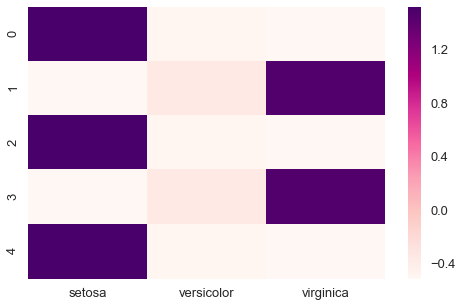

In [9]:
visualizeUncertainty(clf.decision_function(X_test)[:5])

In [10]:
clf.classes_[np.argmax(clf.predict_proba(X_train)[:5], axis = 1)].tolist()

['setosa', 'setosa', 'virginica', 'versicolor', 'setosa']

# Predicted Probabilities
1. Range is present between 0 and 1
1. Because the probabilities for the two classes sum to 1, exactly one of the classes will be above 50% certainty. That class is the one that is predicted
1. A model that is more overfitted tends to make more certain predictions, even if they might be wrong
1. A model with less complexity usually has more uncertainty in its predictions
1. A model is called calibrated if the reported uncertainty actually matches how correct it is in a calibrated model, a prediction made with 70% certainty would be correct 70% of the time
1. shape (n_sample, n_classes)

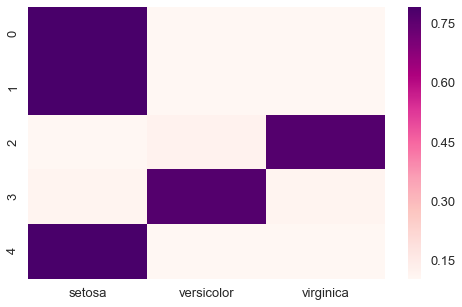

In [11]:
visualizeUncertainty(clf.predict_proba(X_train)[:5])

In [12]:
clf.classes_[np.argmax(clf.predict_proba(X_train)[:5], axis = 1)].tolist()

['setosa', 'setosa', 'virginica', 'versicolor', 'setosa']